In [2]:
import pandas as pd
import numpy as np
import itertools
import torch
import random
import sys
from torch import nn
from tqdm import trange
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
b = np.load(f'/kaggle/input/alvi-hack-2023/data_train/00.npz')

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
import math
%matplotlib inline

In [5]:
b.files

['data_myo', 'myo_ts', 'data_vr']

In [5]:
b['myo_ts']

array([854.1514441, 854.1603555, 854.160362 , ..., 913.0933145,
       913.1008411, 913.1008488])

In [11]:
['data_vr'][0]

'data_vr'

In [16]:
print(sum(b['data_vr'][0]))

[-0.34344622  0.67095528 -0.06405009 -7.98034389]


In [6]:
b['data_myo']

array([[-0.2       , -0.11372549, -0.01176471, ..., -0.00392157,
        -0.01176471, -0.01176471],
       [ 0.05098039, -0.04313725, -0.01960784, ...,  0.01176471,
         0.00392157, -0.01176471],
       [ 0.04313725,  0.06666667,  0.04313725, ..., -0.00392157,
        -0.03529412, -0.05098039],
       ...,
       [-0.05098039, -0.02745098, -0.01176471, ..., -0.01960784,
        -0.00392157, -0.01176471],
       [ 0.06666667,  0.01176471, -0.01176471, ...,  0.01960784,
        -0.01960784, -0.02745098],
       [-0.25490196, -0.09803922, -0.05882353, ...,  0.05882353,
         0.00392157, -0.12941176]])

In [7]:
b['data_vr'][0]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e+00],
       [ 6.77024753e-02, -4.60947056e-02, -4.66271158e-01,
         8.80842131e-01],
       [ 5.65067190e-02, -6.26462903e-04, -8.39765785e-01,
         5.40000023e-01],
       [ 6.19710865e-02,  4.12367015e-02, -9.57633712e-01,
         2.78202791e-01],
       [-2.81841348e-05,  2.19262580e-02,  3.63355901e-01,
        -9.31392360e-01],
       [-6.64779278e-03, -1.49709973e-02, -5.19656828e-01,
         8.54218039e-01],
       [ 4.59721290e-02, -8.38512019e-03,  5.41764551e-01,
        -8.39230257e-01],
       [ 1.35881057e-01, -9.51402576e-02,  1.44485338e-01,
        -9.75504309e-01],
       [ 2.14047945e-01, -8.90571610e-02,  4.18748156e-01,
        -8.78010411e-01],
       [ 2.42727564e-01, -1.78067522e-02,  5.16116750e-01,
        -8.21212365e-01],
       [ 5.94101020e-02, -3.19592902e-02,  2.48137626e-01,
        -9.66372993e-01],
       [ 1.02143285e-01, -2.49704255e-02,  4.36601321e-01,
      

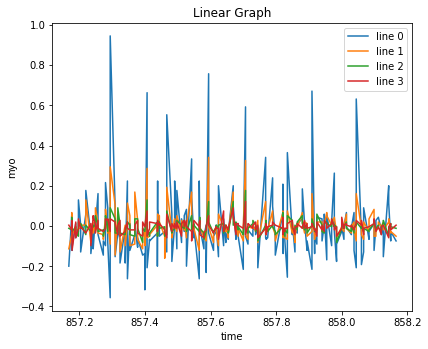

In [6]:
Time_Array = b['myo_ts'][600:800]
 
# Actual data array which needs to be plot
Data0 = [m[0] for m in b['data_myo']][:200]
Data1 = [m[1] for m in b['data_myo']][:200]
Data2 = [m[2] for m in b['data_myo']][:200]
Data3 = [m[3] for m in b['data_myo']][:200]
fig = plt.figure(figsize = (5, 4))
 
# Adding the axes to the figure
ax = fig.add_axes([1, 1, 1, 1])
 
# plotting 1st dataset to the figure
ax1 = ax.plot(Time_Array, Data0)
 
# plotting 2nd dataset to the figure
ax2 = ax.plot(Time_Array, Data1)
ax1 = ax.plot(Time_Array, Data2)
ax2 = ax.plot(Time_Array, Data3)
 
# Setting Title
ax.set_title("Linear Graph")
 
# Setting Label
ax.set_xlabel("time")
ax.set_ylabel("myo")
 
# Adding Legend
ax.legend(labels = ('line 0', 'line 1', 'line 2', 'line 3'))
 
plt.show()

In [7]:
time = b['myo_ts'][600:]
emg0 = [m[0] for m in b['data_myo']][:]
emg = b['data_myo'][:]

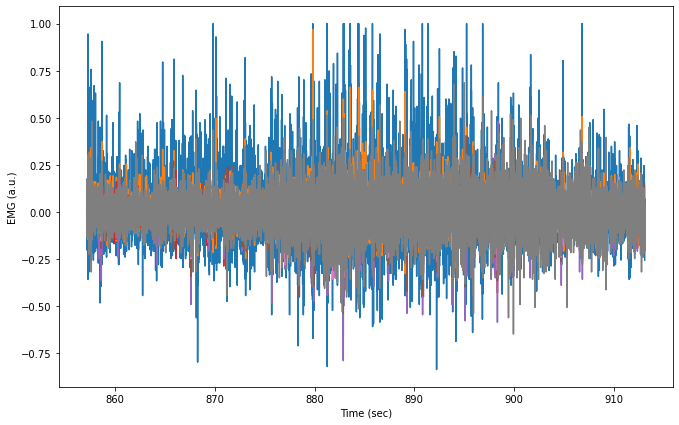

In [8]:
# simulate EMG signal
#burst1 = np.random.uniform(-1, 1, size=1000) + 0.08
#burst2 = np.random.uniform(-1, 1, size=1000) + 0.08
#quiet = np.random.uniform(-0.05, 0.05, size=500) + 0.08
#emg = np.concatenate([quiet, burst1, quiet, burst2, quiet])
#time = np.array([i/1000 for i in range(0, len(emg), 1)]) # sampling rate 1000 Hz

# plot EMG signal
fig = plt.figure()
plt.plot(time, emg)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')
fig_name = 'fig2.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

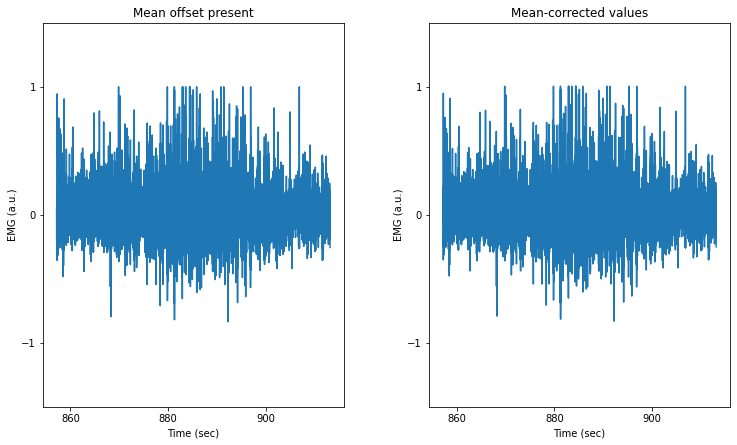

In [13]:
# process EMG signal: remove mean
emg_correctmean = emg0 - np.mean(emg0)

# plot comparison of EMG with offset vs mean-corrected values
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Mean offset present')
plt.plot(time, emg0)
plt.locator_params(axis='x', nbins= 4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Mean-corrected values')
plt.plot(time, emg_correctmean)
plt.locator_params(axis='x', nbins= 4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig2.png'
fig.set_size_inches(w= 11,h= 7)
fig.savefig(fig_name)

In [11]:
import scipy as sp
from scipy import signal

In [17]:
import scipy as sp
from scipy import signal

# create bandpass filter for EMG
high = 20/(1000/2)
low = 450/(1000/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

# process EMG signal: filter EMG
emg_filtered = sp.signal.filtfilt(b, a, emg_correctmean)

# plot comparison of unfiltered vs filtered mean-corrected EMG
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Unfiltered EMG')
plt.plot(time, emg_correctmean)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Filtered EMG')
plt.plot(time, emg_filtered)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig3.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

ValueError: The length of the input vector x must be greater than padlen, which is 27.

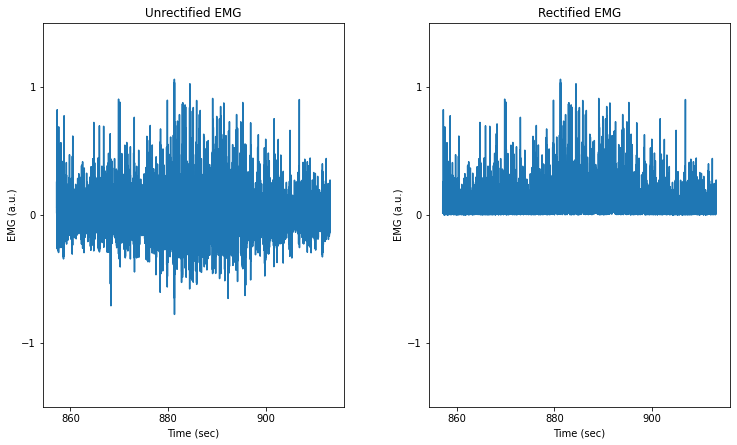

In [69]:
emg_rectified = abs(emg_filtered)

# plot comparison of unrectified vs rectified EMG
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1).set_title('Unrectified EMG')
plt.plot(time, emg_filtered)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).set_title('Rectified EMG')
plt.plot(time, emg_rectified)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)
plt.ylim(-1.5, 1.5)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig4.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

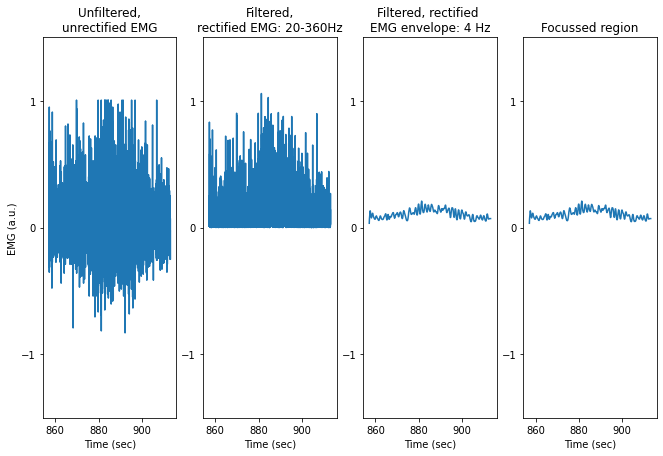

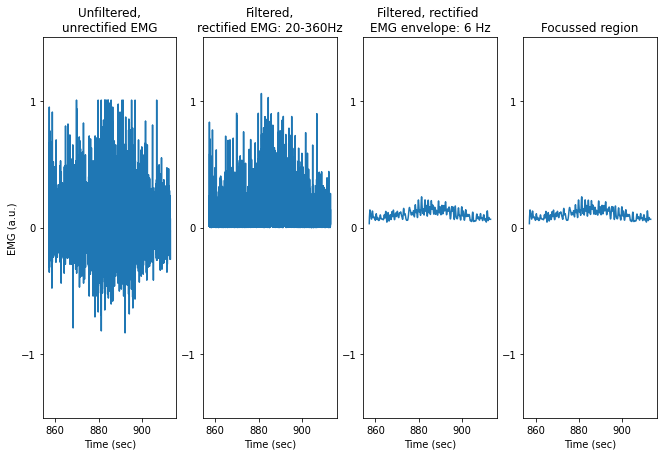

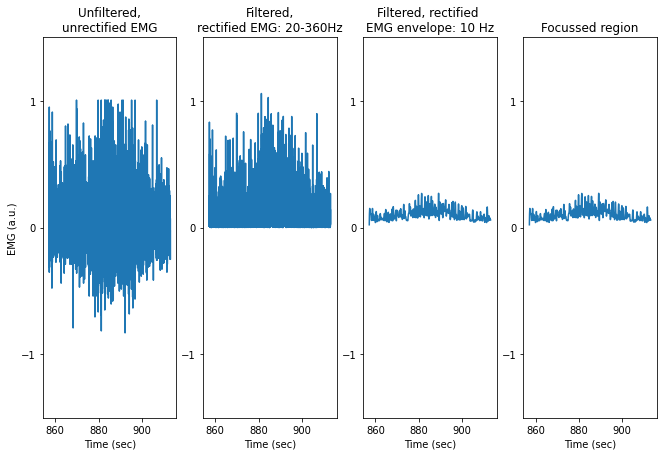

In [15]:
def filteremg(time, emg, low_pass=5, sfreq=400, high_band=10, low_band=180):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/(sfreq/2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    # plot graphs
    fig = plt.figure()
    plt.subplot(1, 4, 1)
    plt.subplot(1, 4, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    plt.plot(time, emg)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    
    plt.subplot(1, 4, 2)
    plt.subplot(1, 4, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    plt.plot(time, emg_rectified)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    #plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    plt.subplot(1, 4, 3)
    plt.subplot(1, 4, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(time, emg_envelope)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    #plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')
    
    plt.subplot(1, 4, 4)
    plt.subplot(1, 4, 4).set_title('Focussed region')
    plt.plot(time, emg_envelope)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    #plt.xlim(0.9, 1.0)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Time (sec)')

    fig_name = 'fig_' + str(int(low_pass*sfreq)) + '.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

# show what different low pass filter cut-offs do
for i in [2, 3, 5]:
    filteremg(time, emg_correctmean, low_pass=i)

In [20]:
def filteremg1(time, emg, low_pass=5, sfreq=400, high_band=10, low_band=180):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/(sfreq/2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    return emg_envelope

In [ ]:
for i in range(8):
    emg = []
    filteremg1(time, emg_correctmean, low_pass=i)

In [73]:
! pip install biosppy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [74]:
import biosppy

In [99]:
emg1 = [m[1] for m in b['data_myo']][:]

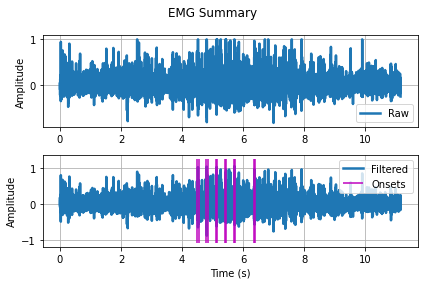

In [152]:
ts, filtered, ind = biosppy.signals.emg.emg(signal=emg0[:], sampling_rate=1000.0, show=True)


In [153]:
ind

array([4495, 4546, 4788, 4843, 5107, 5143, 5405, 5452, 5700, 5735, 6361,
       6399])

In [107]:
b['data_vr'][4497]-b['data_vr'][4496]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.64684778e-03,  1.92315466e-02, -6.75129940e-02,
        -3.88224983e-02],
       [-1.20364150e-02,  2.91316426e-02, -1.59626763e-01,
        -2.63181312e-01],
       [-1.58754475e-02,  2.82164681e-02, -1.36684795e-01,
        -4.31630835e-01],
       [-9.89500166e-04,  2.87868705e-03, -1.06817865e-02,
        -3.40499606e-03],
       [-1.76755551e-03,  2.42493183e-03, -2.21776806e-02,
        -1.14983967e-02],
       [-1.20001753e-03,  3.44703877e-03, -2.05413921e-02,
        -1.19323966e-02],
       [-3.23493075e-01,  1.67564442e-01, -6.26123574e-01,
         1.86390255e+00],
       [ 6.99808194e-05, -1.37031379e-02, -3.82840940e-02,
        -2.09678369e-02],
       [-6.44019255e-04, -1.30112954e-02, -3.73842012e-02,
        -2.61254263e-02],
       [ 1.56701333e-05, -1.94151220e-03, -5.12016003e-03,
        -1.28642019e-03],
       [-1.16403762e-04, -2.27365771e-03, -9.71923803e-03,
      

In [13]:
import scipy as sp
from scipy import signal

In [37]:
min(Data)

-0.10588235294117643

In [19]:
full_array_data_myo = []
full_array_data_vr = []
full_array_data_ts = []
for num_file in trange(0, 58):
    if num_file < 10:
        num_file = '0' + str(num_file)
    else:
        num_file = str(num_file)
    b = np.load(f'/kaggle/input/alvi-hack-2023/data_train/{num_file}.npz')
    for num in b['data_myo']:
        full_array_data_myo.append(num)
    for num in b['data_vr']:
        num = list(itertools.chain.from_iterable(num))
        full_array_data_vr.append(num)
    for num in b['myo_ts'][600:]:
        full_array_data_ts.append(num)

100%|██████████| 58/58 [00:19<00:00,  2.93it/s]


In [1]:
full_array_data_vr[0]

NameError: name 'full_array_data_vr' is not defined

In [75]:
filtred_myo1 = []
for i in range(8):
    emg = [m[i] for m in full_array_data_myo]
    emg_correctmean = emg - np.mean(emg)
    filtred_myo1.append(filteremg1(time, emg_correctmean, low_pass=2))

In [76]:
f1 = np.array(filtred_myo1).T

In [24]:
len(f1)

646976

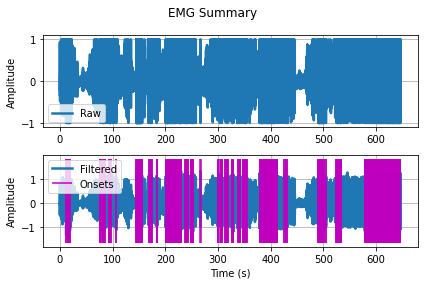

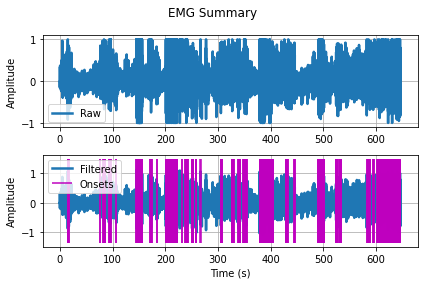

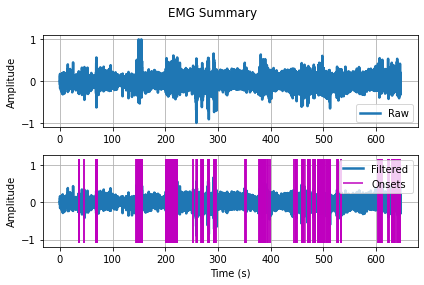

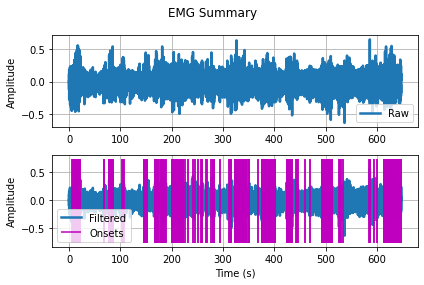

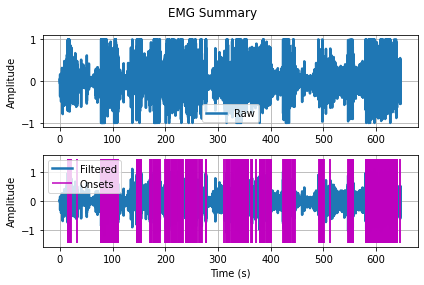

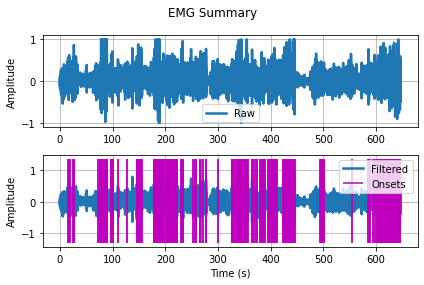

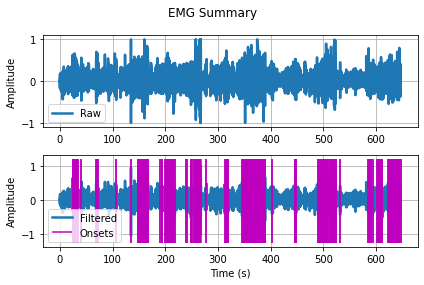

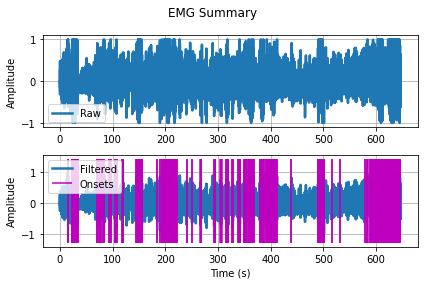

In [159]:
index = []
filtred_myo = []
for i in range(8):
    emg = [m[i] for m in full_array_data_myo]
    ts, filtered, ind = biosppy.signals.emg.emg(signal=emg, sampling_rate=1000.0, show=True)
    filtred_myo.append(filtered)
    index.extend(ind)

In [163]:
f1 = np.array(filtred_myo)

In [169]:
a = f1.T

In [173]:
f1[0]

array([ 0.00051154,  0.19202915,  0.13260372, ..., -0.29891709,
       -0.13226784, -0.00060551])

In [172]:
a[0]

array([ 5.11539315e-04,  1.04245764e-04,  1.24461387e-04, -2.84701727e-04,
        2.79844933e-04, -5.79935819e-05,  1.28563444e-04,  5.80964881e-04])

In [118]:
ft_myo = []
ft_vr = []
for i in index:
    ft_myo.append(full_array_data_myo[i])
    ft_vr.append(full_array_data_vr[i])

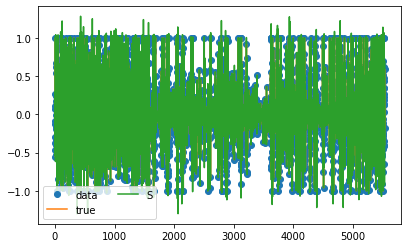

In [146]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = [i for i in range(len(ft_myo))]
y = [ft_myo[i][0] for i in range(len(ft_myo))]
cs = CubicSpline(x, y)
xs = np.arange(0, len(x), len(x)/len(full_array_data_myo))
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y, label='true')
ax.plot(xs, cs(xs), label="S")

ax.legend(loc='lower left', ncol=2)
plt.show()

In [77]:
full_array_data_myo_test = []
# full_array_data_ts = []
for num_file in trange(0, 15):
    if num_file < 10:
        num_file = '0' + str(num_file)
    else:
        num_file = str(num_file)
    b = np.load(f'/kaggle/input/alvi-hack-2023/data_submission/{num_file}.npz')
    for num in b['data_myo']:
        full_array_data_myo_test.append(num)

100%|██████████| 15/15 [00:00<00:00, 119.73it/s]


In [78]:
filtred_myo_test = []
for i in range(8):
    emg = [m[i] for m in full_array_data_myo_test]
    emg_correctmean = emg - np.mean(emg)
    filtred_myo_test.append(filteremg1(time, emg_correctmean, low_pass=2))
f1_test = np.array(filtred_myo_test).T

In [27]:
len(f1_test)

166637

In [79]:
class TorchDataset(torch.utils.data.Dataset):
    
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        return [torch.tensor(self.x_data[idx], dtype=torch.float), 
            torch.tensor(self.y_data[idx], dtype=torch.float)]
        
class TorchDataset_test(torch.utils.data.Dataset):
    
    def __init__(self, x_data):
        self.x_data = x_data
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        return torch.tensor(self.x_data[idx], dtype=torch.float)

In [ ]:
 f1_copy = random.shuffle(lst)

In [80]:
train_size = int(0.8 * len(f1))
train_set = TorchDataset(f1[:train_size], full_array_data_vr[:train_size])
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 1024, shuffle = True)

test_set = TorchDataset(f1[train_size:], full_array_data_vr[train_size:])
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 1024, shuffle = True)

In [81]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
set_random_seed(123456)

In [83]:
model = nn.Sequential(
    nn.Linear(8, 50),
    nn.BatchNorm1d(50),
    nn.LeakyReLU(0.01),
    nn.Dropout(p=0.1),

    nn.Linear(50, 100),
    nn.BatchNorm1d(100),
    nn.LeakyReLU(0.01),
    nn.Dropout(p=0.3),
    
    nn.Linear(100, 10000),
    nn.BatchNorm1d(10000),
    nn.LeakyReLU(0.01),
    nn.Dropout(p=0.3),
    
    nn.Linear(10000, 1024),
    nn.BatchNorm1d(1024),
    nn.LeakyReLU(0.01),
    nn.Dropout(p=0.3),
    
    nn.Linear(1024, 2048),
    nn.BatchNorm1d(2048),
    nn.LeakyReLU(0.01),
    nn.Dropout(p=0.3),
    
    nn.Linear(2048, 1000),
    nn.BatchNorm1d(1000),
    nn.LeakyReLU(0.01),
    nn.Dropout(p=0.3),

    nn.Linear(1000, 64),
)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.MSELoss().to(device)
model = model.to(device)

In [84]:
def train(model, optimizer, criterion, train_loader, test_loader):
    mass_RMSE = []
    model.train()
    for epoch in range(30):
        train_loss = 0 
        with tqdm(total=len(train_loader), file=sys.stdout) as epoch_bar:
            for x_train, y_train in train_loader:
                x_train = x_train.to(device)     
                y_train = y_train.to(device)              
                y_pred = model(x_train)                                               
                loss = criterion(y_pred, y_train)                                     
                loss.backward()                                                       
                optimizer.step()                                                      
                optimizer.zero_grad()                                                                                                                                  
                    # y_pred_inverse = torch.Tensor(scalery.inverse_transform(y_pred))
                    # y_train_inverse = torch.Tensor(scalery.inverse_transform(y_train))                
                train_loss += loss.item()
                epoch_bar.set_description(f"Train_loss: {np.sqrt(train_loss) / len(train_loader): .3f}")
                epoch_bar.update(1)                                      
        mass_RMSE.append(np.sqrt(train_loss / len(train_loader)))
        evaluate = test(model, criterion, test_loader)
        print(f"Epoch: {epoch}, RMSE Train: {np.sqrt(train_loss / len(train_loader))}, RMSE Val: {evaluate}")
        
        
def test(model, criterion, test_loader):
    model.eval()
    val_loss = 0
    with torch.no_grad(): 
        with tqdm(total=len(test_loader), file=sys.stdout) as eval_bar:                                                                                                                          
                for x_val, y_val in test_loader:
                    x_val = x_val.to(device)     
                    y_val = y_val.to(device)
                    y_pred = model(x_val)                                                
                    # y_pred_inverse = torch.Tensor(scalery.inverse_transform(y_pred))
                    # y_val_inverse = torch.Tensor(scalery.inverse_transform(y_val))
                    loss = criterion(y_pred, y_val)                       
                    val_loss += loss.item()
                    eval_bar.set_description(f"Val_loss: {np.sqrt(val_loss) / len(test_loader): .3f}")
                    eval_bar.update(1)                                               
    return(np.sqrt(val_loss / len(test_loader)))

def predict(model, loader):
    model.eval()
    prediction_list = []
    with torch.no_grad():
        with tqdm(total=len(test_loader), file=sys.stdout) as eval_bar:
            for data_x in loader:
                data_x = data_x.to(device)
                pred = model(data_x)
                pred = pred.cpu().numpy()
                prediction_list.append(pred)
                eval_bar.update(1)
    return prediction_list
            

In [59]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(f1,full_array_data_vr,verbose=True, plot=True)

KeyboardInterrupt: 

In [85]:
train(model, optimizer, criterion, train_loader, test_loader)

Val_loss:  0.037: 100%|██████████| 127/127 [00:02<00:00, 50.22it/s]
Epoch: 0, RMSE Train: 0.360902869269394, RMSE Val: 0.4222602171574771
Val_loss:  0.041: 100%|██████████| 127/127 [00:02<00:00, 50.30it/s]
Epoch: 1, RMSE Train: 0.27380865195232024, RMSE Val: 0.4579344718061631
Val_loss:  0.042: 100%|██████████| 127/127 [00:03<00:00, 34.46it/s]
Epoch: 2, RMSE Train: 0.21472242164696637, RMSE Val: 0.47689329430116234
Val_loss:  0.042: 100%|██████████| 127/127 [00:03<00:00, 39.18it/s]
Epoch: 3, RMSE Train: 0.1672511371804322, RMSE Val: 0.476756403833399
Val_loss:  0.042: 100%|██████████| 127/127 [00:02<00:00, 48.11it/s]
Epoch: 4, RMSE Train: 0.13353604924124599, RMSE Val: 0.47349876775547856
Val_loss:  0.042: 100%|██████████| 127/127 [00:02<00:00, 43.37it/s]
Epoch: 5, RMSE Train: 0.1158227700368107, RMSE Val: 0.47478212174634976
Val_loss:  0.042: 100%|██████████| 127/127 [00:03<00:00, 39.04it/s]
Epoch: 6, RMSE Train: 0.10559257280660794, RMSE Val: 0.47002446790918617
Val_loss:  0.042: 100

In [86]:
def prepare_predictions_for_csv(list_predictions):
    result = []
    for pred in list_predictions: 
        pred = np.reshape(pred[::10], [-1])
        result.extend(pred)
    result = np.array(result)
    return result

In [87]:
DATA_VAL_FOLDER = Path('/kaggle/input/alvi-hack-2023/data_submission/')
list_preds = []
for p in sorted(DATA_VAL_FOLDER.glob('*.npz')):
    
    file_data = np.load(p)
    myo_data = file_data['data_myo']
    filtred_myo_test =[]
    for i in range(8):
        emg = [m[i] for m in myo_data]
        emg_correctmean = emg - np.mean(emg)
        filtred_myo_test.append(filteremg1(time, emg_correctmean, low_pass=2))
    filtred_myo_test = np.array(filtred_myo_test).T    
    test_dataset = TorchDataset_test(filtred_myo_test)
    sub_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 1, shuffle = True)
    predicts = predict(model, sub_loader)
    
    for i in trange(len(predicts)):
        predicts[i][0][0] = 0
        predicts[i][0][1] = 0
        predicts[i][0][2] = 0
        predicts[i][0][3] = -1
        predicts[i] = predicts[i].reshape(16, 4)
    list_preds.append(predicts)
    
np.savez('predict30_lp2.npz', list_preds)
dummy_pred = prepare_predictions_for_csv(list_preds)
df = pd.DataFrame({'Predicted': dummy_pred})
df.to_csv('/kaggle/working/submission_ft_lp2.csv', index_label = 'Id')

11159it [00:08, 1331.34it/s]                     


100%|██████████| 11159/11159 [00:00<00:00, 509012.83it/s]


11151it [00:09, 1177.19it/s]                     


100%|██████████| 11151/11151 [00:00<00:00, 492660.07it/s]


11149it [00:08, 1384.33it/s]                     


100%|██████████| 11149/11149 [00:00<00:00, 492006.81it/s]


10603it [00:07, 1330.96it/s]                     


100%|██████████| 10603/10603 [00:00<00:00, 511451.07it/s]


11159it [00:08, 1341.68it/s]                     


100%|██████████| 11159/11159 [00:00<00:00, 493637.49it/s]


11157it [00:08, 1295.92it/s]                     


100%|██████████| 11157/11157 [00:00<00:00, 513219.31it/s]


11135it [00:07, 1398.63it/s]                     


100%|██████████| 11135/11135 [00:00<00:00, 505367.91it/s]


11159it [00:08, 1360.24it/s]                     


100%|██████████| 11159/11159 [00:00<00:00, 507919.11it/s]


11129it [00:08, 1273.73it/s]                     


100%|██████████| 11129/11129 [00:00<00:00, 509133.85it/s]


11161it [00:08, 1354.74it/s]                     


100%|██████████| 11161/11161 [00:00<00:00, 497493.30it/s]


11167it [00:08, 1380.39it/s]                     


100%|██████████| 11167/11167 [00:00<00:00, 513662.41it/s]


11165it [00:08, 1363.81it/s]                     


100%|██████████| 11165/11165 [00:00<00:00, 506543.11it/s]


11153it [00:08, 1284.88it/s]                     


100%|██████████| 11153/11153 [00:00<00:00, 496461.37it/s]


11051it [00:08, 1351.55it/s]                     


100%|██████████| 11051/11051 [00:00<00:00, 504684.71it/s]


11139it [00:07, 1406.13it/s]                     


100%|██████████| 11139/11139 [00:00<00:00, 512700.57it/s]


In [72]:
predicts[i][0]

array([-3.1538077e-06, -2.7821745e-05, -5.5343899e-06, -9.9999893e-01],
      dtype=float32)

In [143]:
len(df)

1066880